<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">بخش ۱) تجزیه و تحلیل اولیه از داده‌ها</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا از شما می‌خواهیم به سوالات زیر پاسخ داده تا بینش بهتری از داده‌های موجود پیدا کنید:
</font>
</p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme()

In [6]:
train_data = pd.read_csv('../data/raw/train_data.csv', low_memory=False)
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


#### Task 1.1

<div dir='rtl'>
توزیع ستون overall را رسم کنید. آیا مجموعه‌داده متوازن است؟ اگر خیر، آیا نیاز است برای مدل‌سازی خود آن را متوازن کنید؟ چه راه‌حلی برای این کار پیشنهاد می‌کنید؟
</div>

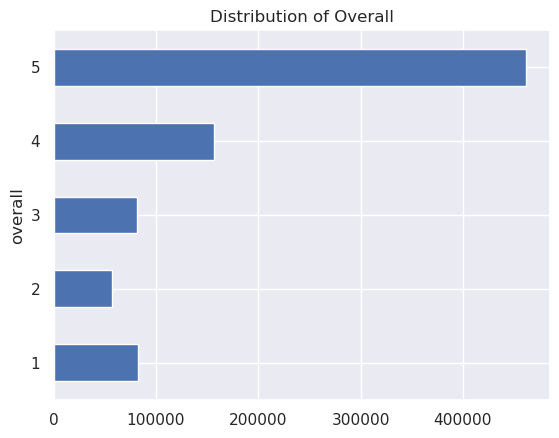

In [7]:
train_data.overall.value_counts().sort_index().plot.barh()
plt.title('Distribution of Overall')
plt.show()

In [ ]:
# Answer Questions
# TO-DO

#### Task 1.2

<div dir='rtl'>
فرض کنید نظراتی که مقدار ستون overall آن‌ها ۴ یا ۵ است را همراه با حس مثبت، نظراتی که مقدارشان ۳ است را خنثی و نظراتی که مقدارشان ۱ یا ۲ است را حس منفی بدانیم. به‌ازای هر کدام از این سه دسته یک ابر کلمات (Word Cloud) رسم کنید تا بتوان کلمات پرتکرار هر دسته را مشاهده کرد. تا حد ممکن سعی کنید ابر کلمات به‌دست‌آمده شامل اطلاعات مفیدی باشد و کلمات زائد (Stop words) بین آن‌ها وجود نداشته باشد. آیا اشتراکی بین کلمات دسته‌ی مثبت و منفی وجود داشته است؟ چگونه آن‌ها را تفسیر می‌کنید؟
</div>

In [23]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [57]:
# preparing data
sample = train_data.sample(frac=0.1, random_state=42)
positive = sample[sample['overall'] > 3]
neutral = sample[sample['overall'] == 3]
negative = sample[sample['overall'] < 3]

In [58]:
# extracting text
positive_text = ' '.join(positive['reviewText'])
neutral_text = ' '.join(neutral['reviewText'])
negative_text = ' '.join(negative['reviewText'])

In [59]:
stop_words = set(stopwords.words('english'))

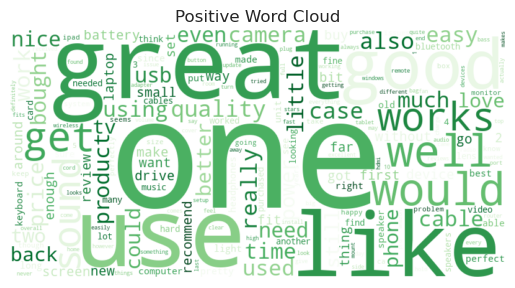

In [60]:
positive_tokens = word_tokenize(positive_text.lower())
positive_tokens = [word for word in positive_tokens if word.isalnum() and word not in stop_words]
positive_freq_dist = FreqDist(positive_tokens)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(positive_freq_dist)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')
plt.show()


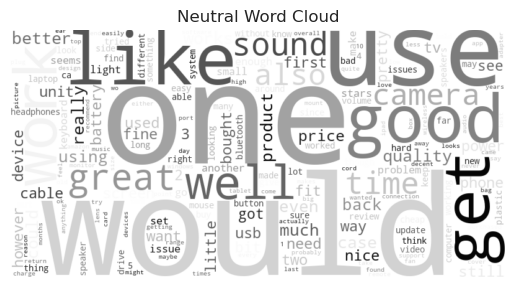

In [61]:
neutral_tokens = word_tokenize(neutral_text.lower())
neutral_tokens = [word for word in neutral_tokens if word.isalnum() and word not in stop_words]
neutral_freq_dist = FreqDist(neutral_tokens)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Grays').generate_from_frequencies(neutral_freq_dist)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Word Cloud')
plt.axis('off')
plt.show()


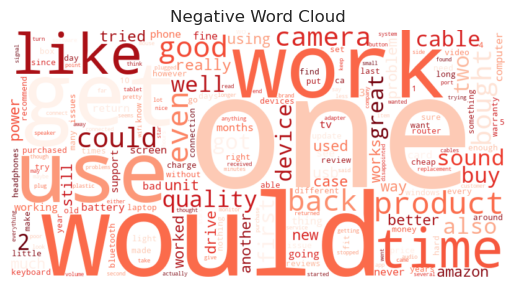

In [62]:
negative_tokens = word_tokenize(negative_text.lower())
negative_tokens = [word for word in negative_tokens if word.isalnum() and word not in stop_words]
negative_freq_dist = FreqDist(negative_tokens)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_freq_dist)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')
plt.show()


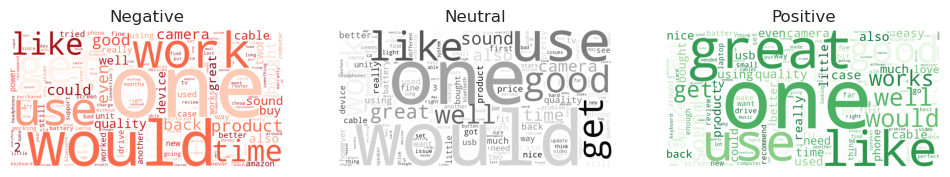

In [73]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative')
plt.subplot(132)
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.title('Neutral')
plt.subplot(133)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')
plt.show()

#### Task 1.3

<div dir='rtl'>
از بین نظردهندگان، ۱۰ نفری که در مجموع نظرات‌شان بیشتر مفید واقع شده (مجموع vote بیشتری داشته‌اند) را پیدا کنید. به‌عنوان مثال اگر شخص «الف» مجموعاً ۲۰ نظر ثبت کرده باشد، باید مجموع مقدار vote تمام ۲۰ نظر وی را محاسبه کنید. این کار را برای تمام افراد انجام داده و ۱۰ نفر برتر را پیدا کنید. نام هر فرد و مجموع vote آن را به‌ترتیب نمایش دهید.
</div>

In [ ]:
# TO-DO

#### Task 1.4

<div dir='rtl'>
هیستوگرام طول متن (تعداد کاراکتر) ستون reviewText را رسم کنید. یک‌بار با حالت اصلی رسم کنید و یک‌بار به‌صورت فیلترشده (آن دسته‌هایی که تعداد نمونه‌های کم و پرتی دارند را در نظر نگیرید) ترسیم کنید. انتخاب تعداد دسته‌ها (bins) برعهده‌ی خودتان است و نمودار خروجی شما باید مناسب و خوانا باشد. آیا نیاز است در هنگام مدل‌سازی محدودیتی روی تعداد کاراکترها بگذاریم؟ اگر بله، بازه‌ی پیشنهادی شما چه عددهایی است؟
</div>

In [ ]:
# TO-DO

#### Task 1.5

<div dir='rtl'>
کدام محصولات بیشترین امتیاز ۵ را کسب کرده‌اند؟ ۱۰ مورد برتر را به‌ترتیب به‌صورت یک جدول شامل نام برند، عنوان محصول و تعداد نظرات با امتیاز ۵ نمایش دهید.
</div>

In [ ]:
# TO-DO

#### Task 1.6

<div dir='rtl'>
ابتدا ۱۰ برندی که بیشترین تعداد نظر را داشته‌اند پیدا کنید. سپس میانگین امتیاز هر کدام را محاسبه کرده و یک جدول شامل نام برند و میانگین امتیاز آن به‌ترتیب میانگین امتیاز نمایش دهید.
</div>

In [ ]:
# TO-DO